# The purpose of this notebook is to build some functions for inverse distance weighting metho that will be used in the final analysis.  Checks were preformed on the intial sample data from a book.  So images are included for the expected answers and they match.

In [4]:
import pandas as pd

In [1]:
import numpy as np

In [120]:
import linecache

In [95]:
data = np.array([['Point','Distance(m)', 'Omega(C)'],
                ['G1',1.000, 30.480],
                ['G2',2.00, 33.020],
                ['G2',2.236, 25.400],
                ['G4',2.828, 24.130],
                ['G5',3.162, 22.860],
                ['G6',3.162, 25.400],
                ['G7',3.162, 38.100],
                ['G8',3.606, 41.910],
                ['G9',4.123, 20.320]])

In [90]:
data

array([['Point', 'Distance(m)', 'Omega(C)'],
       ['G1', '1.0', '30.48'],
       ['G2', '2.0', '33.02'],
       ['G2', '2.236', '25.4'],
       ['G4', '2.828', '24.13'],
       ['G5', '3.162', '22.86'],
       ['G6', '3.162', '25.4'],
       ['G7', '3.162', '38.1'],
       ['G8', '3.606', '41.91'],
       ['G9', '4.123', '20.32']], 
      dtype='|S11')

In [65]:
data_pd = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

In [53]:
print data

[['Point' 'Distance(m)' 'Omega(C)']
 ['G1' '1.0' '30.48']
 ['G2' '2.0' '33.02']
 ['G2' '2.236' '25.4']
 ['G4' '2.828' '24.13']
 ['G5' '3.162' '22.86']
 ['G6' '3.162' '25.4']
 ['G7' '3.162' '38.1']
 ['G8' '3.606' '41.91']
 ['G9' '4.123' '20.32']]


In [71]:
data_pd[['Distance(m)','Omega(C)']] = data_pd[['Distance(m)','Omega(C)']].astype(float)

In [73]:
data_pd.dtypes

Distance(m)    float64
Omega(C)       float64
dtype: object

In [74]:
k=1

In [75]:
weight= 1/(data_pd['Distance(m)'])**k

In [76]:
weight

G1    1.000000
G2    0.500000
G2    0.447227
G4    0.353607
G5    0.316256
G6    0.316256
G7    0.316256
G8    0.277316
G9    0.242542
Name: Distance(m), dtype: float64

In [34]:
data_pd

,Distance(m),Omega(C)
G1,1.0,30.48
G2,2.0,33.02
G2,2.236,25.4
G4,2.828,24.13
G5,3.162,22.86
G6,3.162,25.4
G7,3.162,38.1
G8,3.606,41.91
G9,4.123,20.32


In [82]:
data_pd['1/D'] = weight


In [83]:
data_pd

,Distance(m),Omega(C),1/D
G1,1.000,30.48,1.000000
G2,2.000,33.02,0.500000
G2,2.236,25.40,0.447227
G4,2.828,24.13,0.353607
G5,3.162,22.86,0.316256
G6,3.162,25.40,0.316256
G7,3.162,38.10,0.316256
G8,3.606,41.91,0.277316
G9,4.123,20.32,0.242542


In [105]:
def ID(distance_col, k):
    value = 1/(distance_col)**k
    return value

In [106]:
data_pd['1/D^2'] = ID(data_pd['Distance(m)'],2)

In [107]:
data_pd['1/D^3'] = ID(data_pd['Distance(m)'],3)

In [108]:
data_pd

,Distance(m),Omega(C),1/D,1/D^2,1/D^3
G1,1.000,30.48,1.000000,1.000000,1.000000
G2,2.000,33.02,0.500000,0.250000,0.125000
G2,2.236,25.40,0.447227,0.200012,0.089451
G4,2.828,24.13,0.353607,0.125038,0.044214
G5,3.162,22.86,0.316256,0.100018,0.031631
G6,3.162,25.40,0.316256,0.100018,0.031631
G7,3.162,38.10,0.316256,0.100018,0.031631
G8,3.606,41.91,0.277316,0.076904,0.021327
G9,4.123,20.32,0.242542,0.058827,0.014268


In [103]:
D = sum(data_pd['1/D']*data_pd['Omega(C)'])/sum(data_pd['1/D'])

In [104]:
D

29.379469554640352

In [109]:
def IDW(ID_col,omega_col):
    value = sum(ID_col*omega_col)/sum(ID_col)
    return value

In [112]:
IDW(data_pd['1/D^2'],data_pd['Omega(C)'])

29.782872770465627

In [113]:
IDW(data_pd['1/D^3'],data_pd['Omega(C)'])

30.134786188442941

![title](C:\Users\m2echjmh\Desktop\Evap_CURG\IDWM\Example.jpg)

In [116]:
from IPython.display import Image

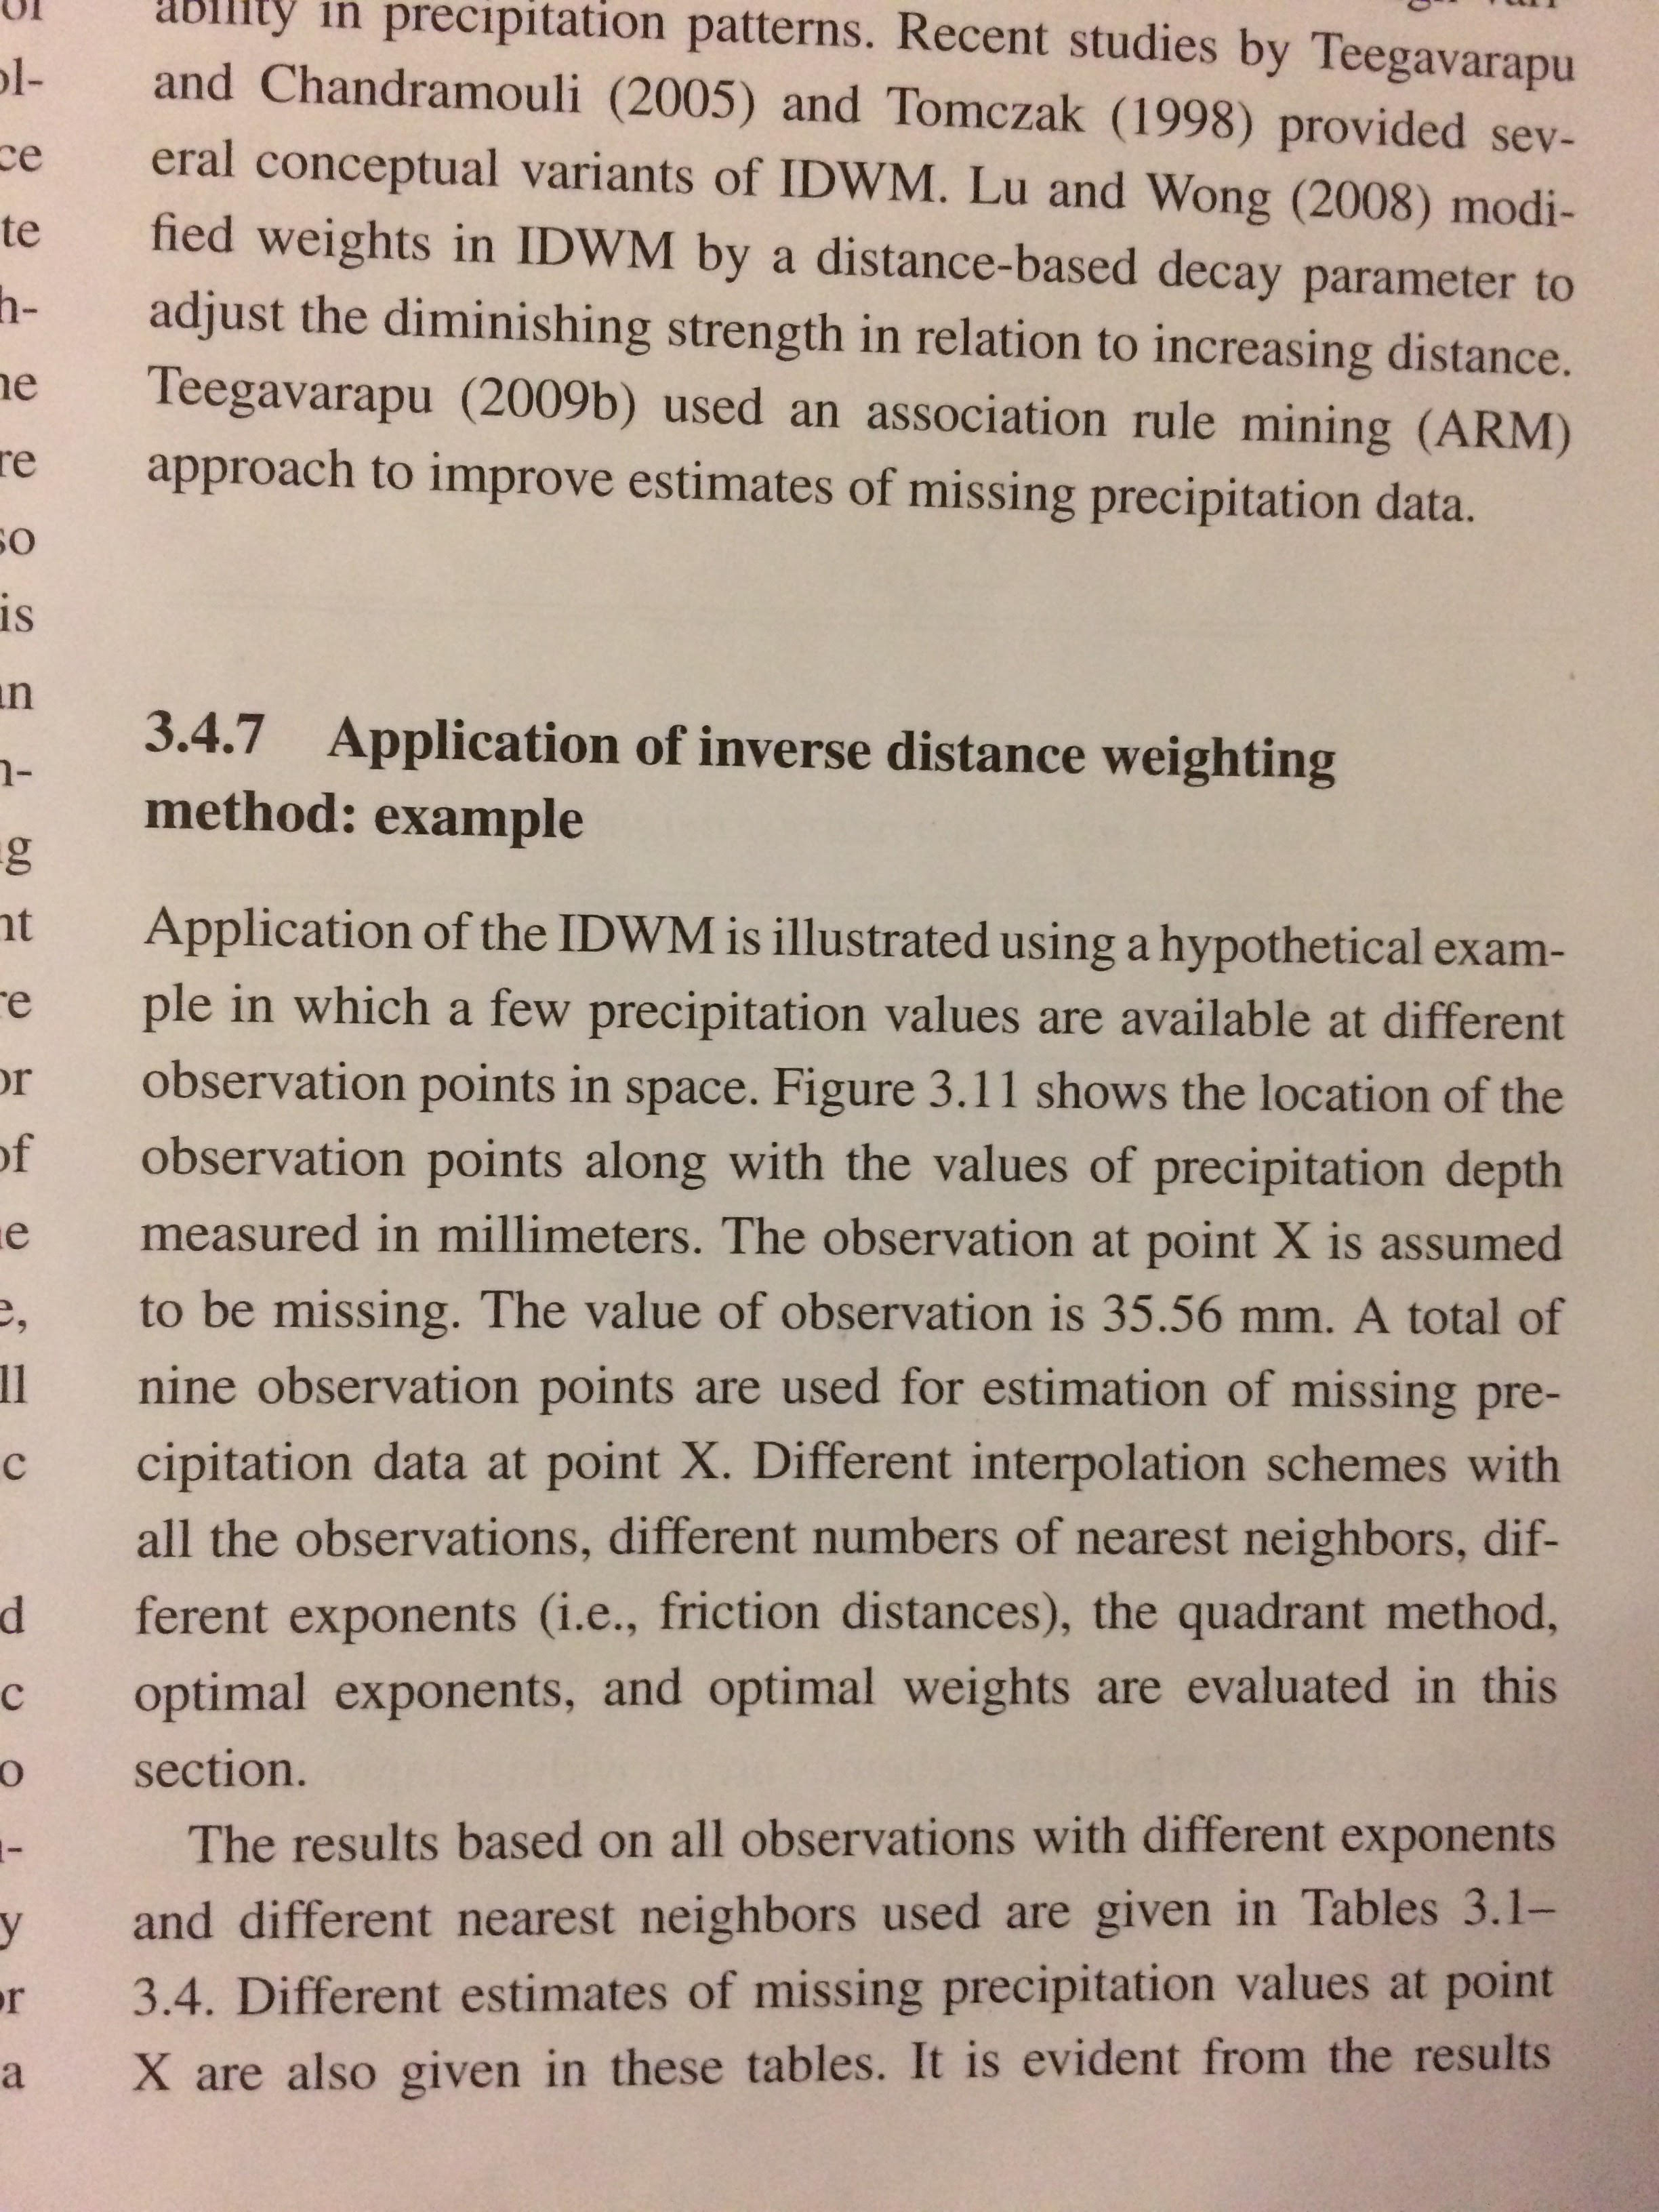

In [117]:
Image("C:\Users\m2echjmh\Desktop\Evap_CURG\IDWM\Example.jpg")

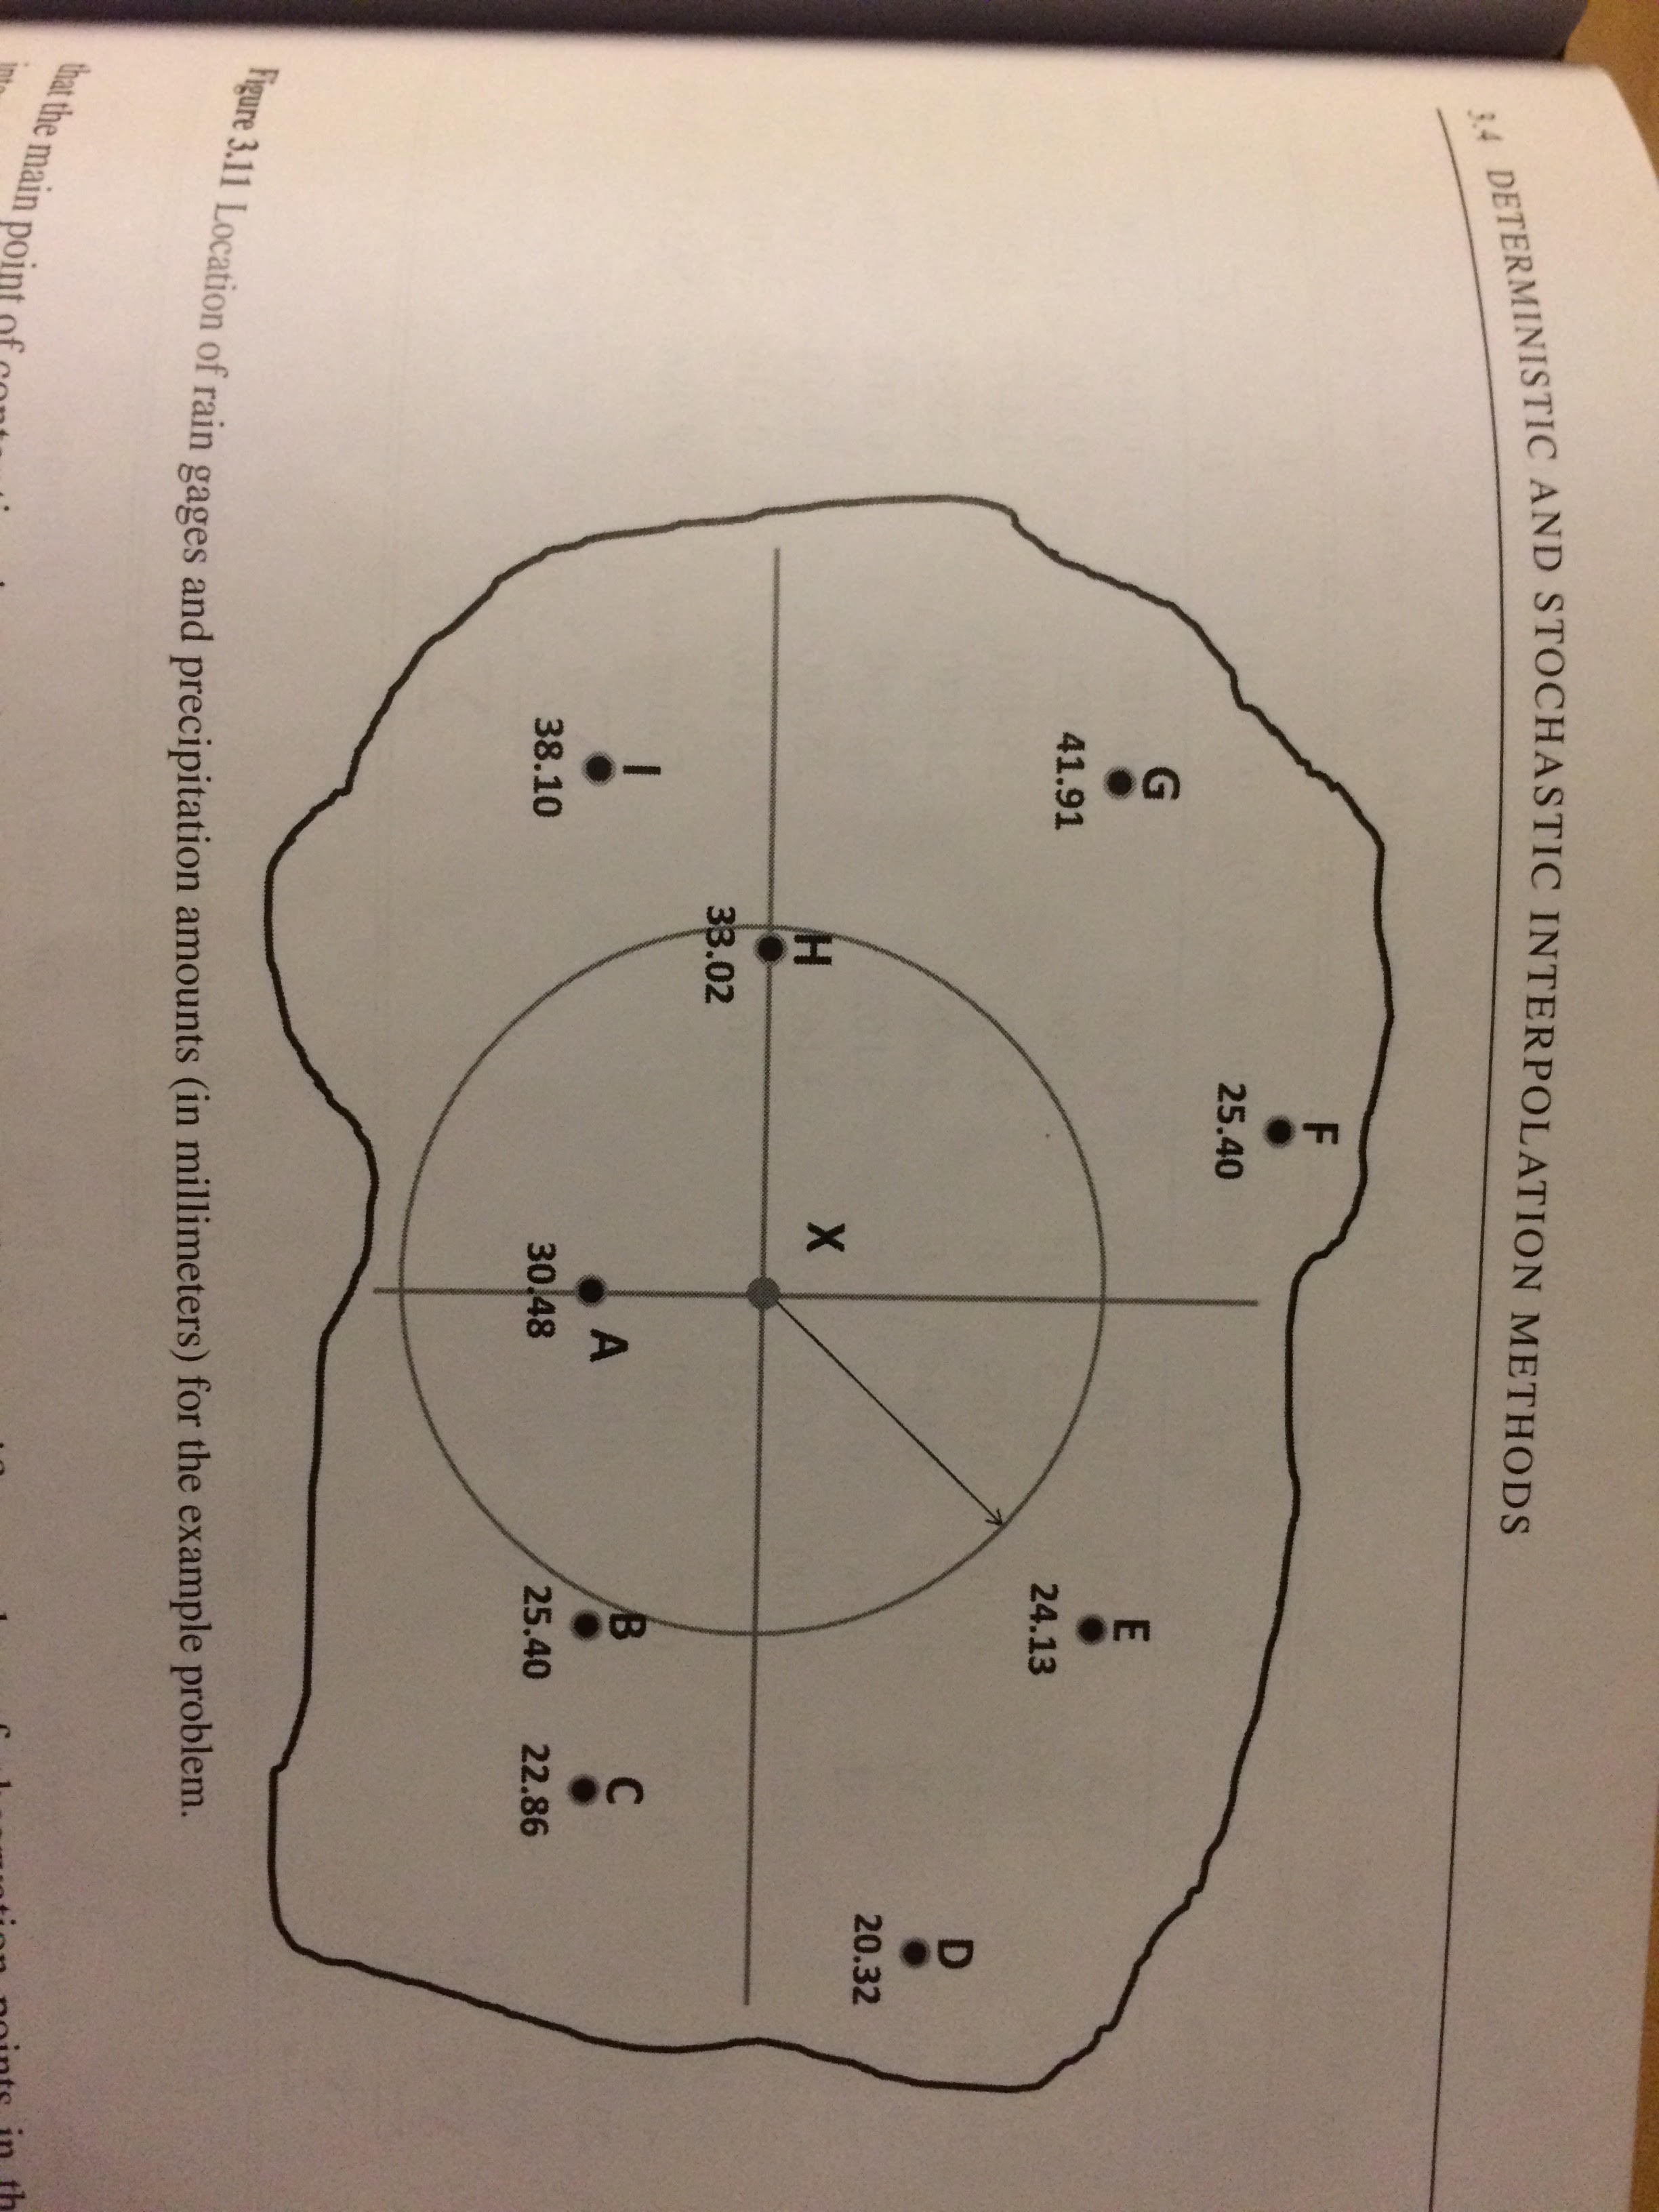

In [118]:
Image("C:\Users\m2echjmh\Desktop\Evap_CURG\IDWM\Example2.jpg")

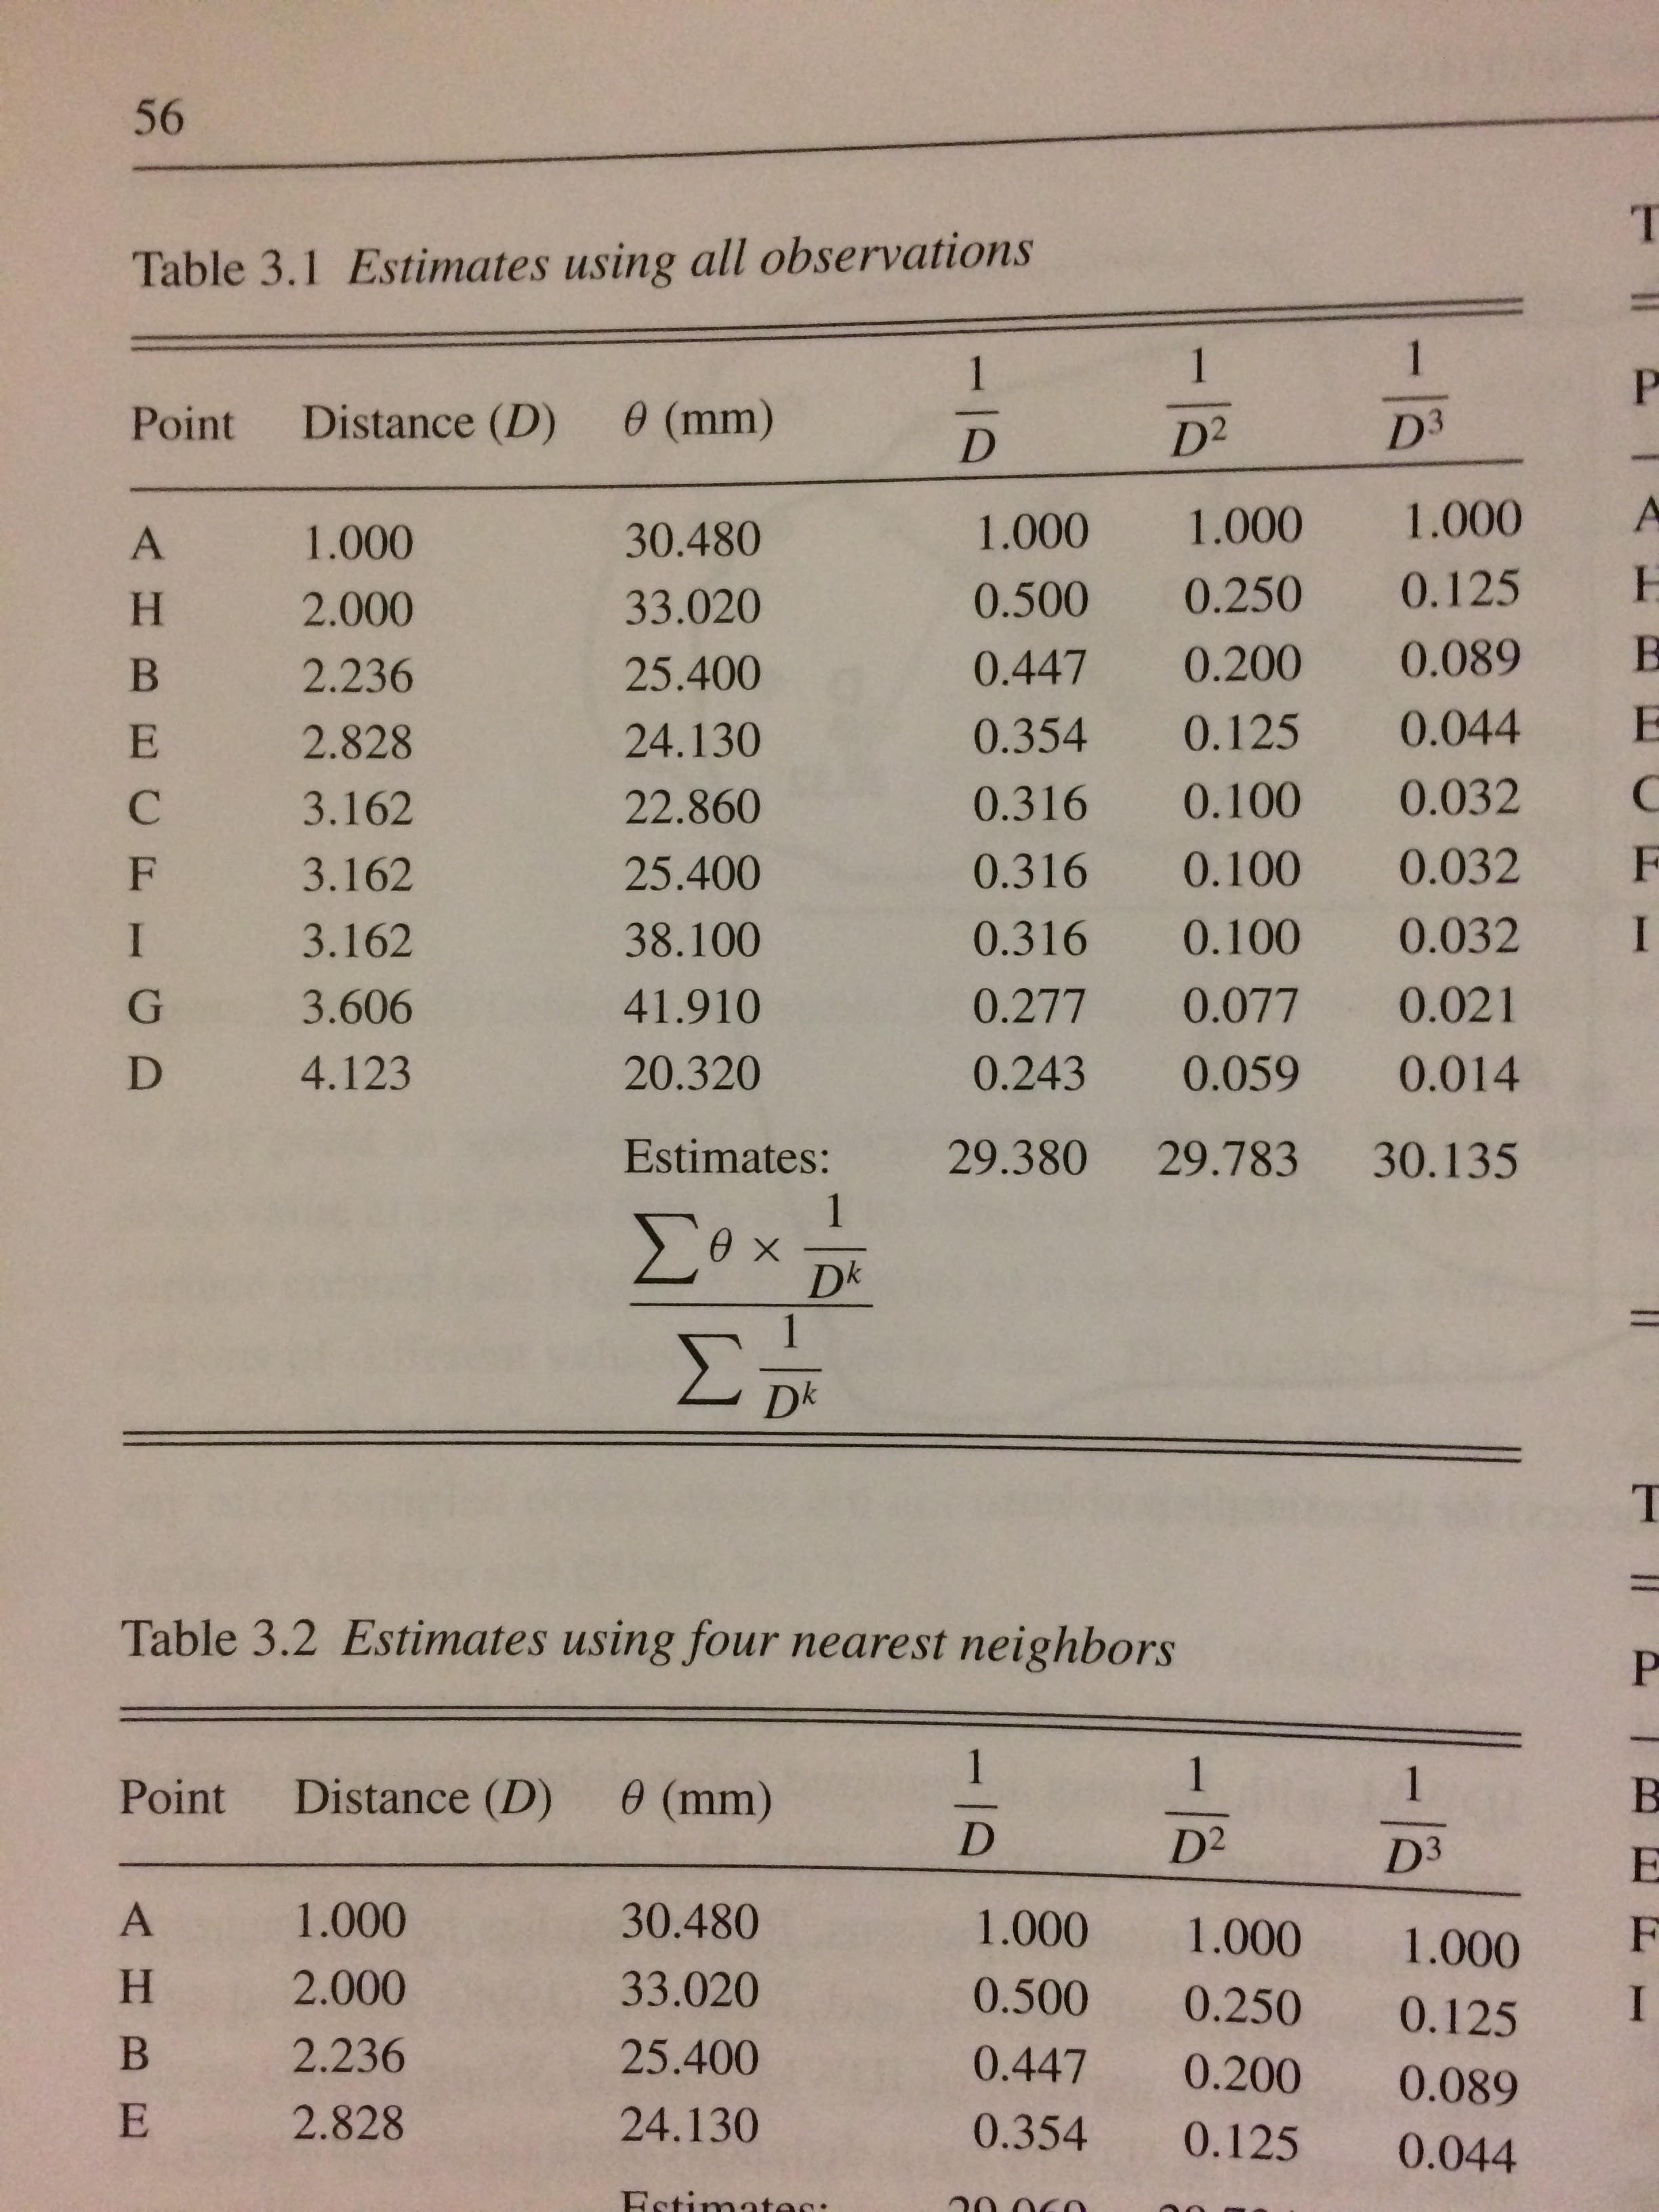

In [119]:
Image("C:\Users\m2echjmh\Desktop\Evap_CURG\IDWM\Example3.jpg")

In [ ]:
df1 = pd.read_csv(filename_input2)